# 1番大きなフラグメントを残して他を除去

rdkit.Chem.MolStandardize.fragment.LargestFragmentChooser()

# 水素の付加

rdkit.Chem.AddHs(mol, addCoords=True)

# 構造最適化

rdkit.AllChem.MMFFOptimizeMolecule(mol)

In [1]:
import platform
# 使用しているOSを表示
platform.platform()

'macOS-10.16-x86_64-i386-64bit'

In [2]:
# pythonのversionを表示
!python -V

Python 3.9.7


In [3]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.3.2'

In [4]:
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors, Draw
from rdkit.ML.Descriptors import MoleculeDescriptors
print(rdBase.rdkitVersion)

2021.03.5


# 複数分子の読み込み

In [5]:
suppl = Chem.SDMolSupplier('data/PubChem_TCI_phenol_records.sdf')

In [6]:
mols = [mol for mol in suppl]

In [7]:
len(suppl)

117

/opt/anaconda3/envs/lecture-beginner/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 3. Change the maxMols value to display more.
  warnings.warn(


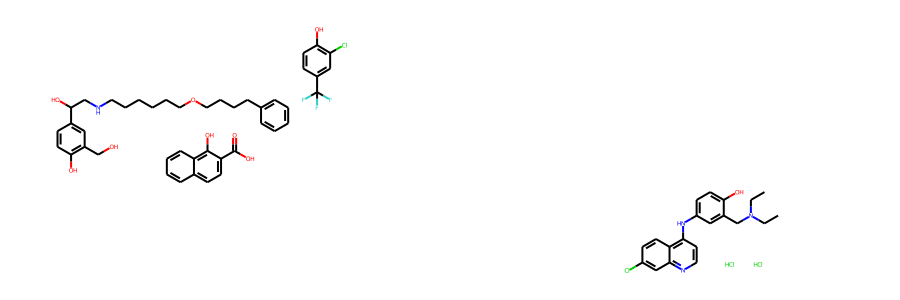

In [8]:
Draw.MolsToGridImage(mols, maxMols=3, molsPerRow=3, subImgSize=(300,300))

# 1番大きなフラグメントを残して他を除去する。

In [9]:
from rdkit.Chem import MolStandardize

lfc = MolStandardize.fragment.LargestFragmentChooser()
# new_mols = [mol for lfc.choose(mol) in mols]
# new_mols

In [10]:
#意味は、for文と同じですがリスト内合表記にしています。新しくリストを作る際には、こちらの書き方の方がすっきり書けるのと実行速度が速いです。
mols2 = [lfc.choose(mol) for mol in mols ]

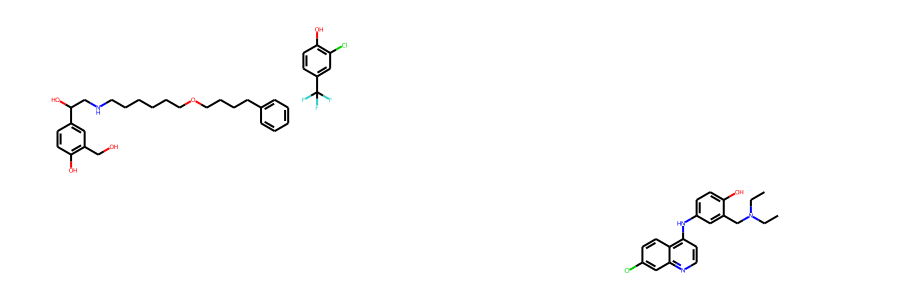

In [11]:
Draw.MolsToGridImage(mols2, maxMols=3, molsPerRow=3, subImgSize=(300,300))

# 水素の付加

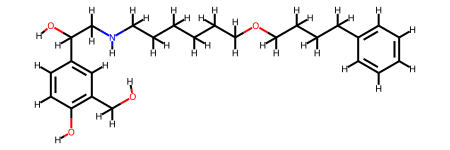

In [12]:
Chem.AddHs(mols2[0], addCoords=True)

In [13]:
mols2 = [Chem.AddHs(mol, addCoords=True) for mol in mols2 ]

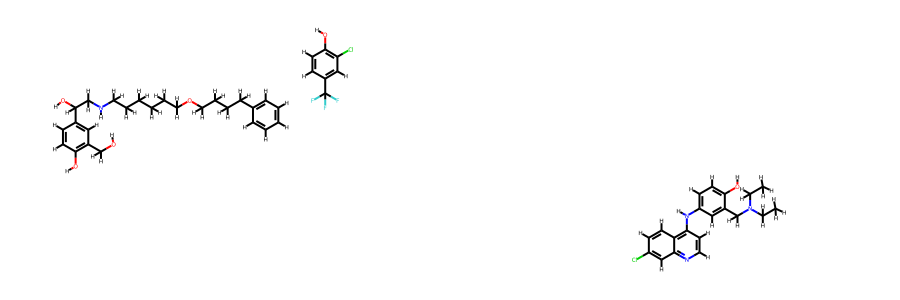

In [14]:
Draw.MolsToGridImage(mols2, maxMols=3, molsPerRow=3, subImgSize=(300,300))

# 構造最適化

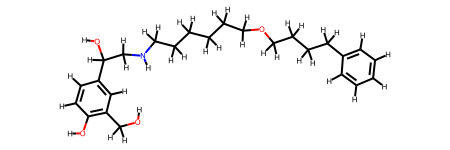

In [15]:
# 配座探索などが必要です。今後の講義で詳しく述べます。ここでは機能紹介だけです。
from rdkit.Chem import AllChem
n = 0
Chem.AddHs(mols2[n], addCoords=True)
AllChem.MMFFOptimizeMolecule(mols2[n])
mols2[n]

# 参考資料

RDKitによるコンフォマーの生成<br>
https://future-chem.com/rdkit-conformer/